In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
bike_trips = pd.read_csv('datasets/bike_trips.csv')

In [3]:
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9728 non-null   int64  
 1   index              9728 non-null   int64  
 2   trip_id            9728 non-null   int64  
 3   bike_id            9728 non-null   int64  
 4   trip_duration      9728 non-null   float64
 5   trip_start_time    9728 non-null   object 
 6   trip_end_time      9728 non-null   object 
 7   from_station       9728 non-null   object 
 8   from_station_id    9728 non-null   int64  
 9   from_station_mode  9728 non-null   object 
 10  from_lat           9728 non-null   float64
 11  from_long          9728 non-null   float64
 12  to_station         9728 non-null   object 
 13  to_station_id      9728 non-null   float64
 14  to_station_mode    9728 non-null   object 
 15  to_lat             9728 non-null   float64
 16  to_long            9728 

In [4]:
bike_trips.drop(columns="Unnamed: 0", inplace=True, index=1)
bike_trips.shape

(9727, 16)

In [5]:
# remove NaN and negative trip size
bike_trips = bike_trips.dropna(subset=['trip_duration'])


In [6]:
# correct datatypes
bike_trips['trip_start_time'] = pd.to_datetime(bike_trips['trip_start_time'])
bike_trips['trip_end_time'] = pd.to_datetime(bike_trips['trip_end_time'])
bike_trips

,index,trip_id,bike_id,trip_duration,trip_start_time,trip_end_time,from_station,from_station_id,from_station_mode,from_lat,from_long,to_station,to_station_id,to_station_mode,to_lat,to_long
0,998695,1001,13022,23.0,2019-03-11 16:39:41,2019-03-11 17:02:49,Karl-Marx Allee,1465,station,52.517298,13.441311,Oranienplatz,1445.0,station,52.501950,13.416246
2,922715,1003,13023,75.0,2019-03-11 08:47:44,2019-03-11 10:03:18,Helsingforser Platz,1458,station,52.507848,13.449569,BIKE 13023,0.0,floating,52.486205,13.376501
3,451393,1004,13026,11.0,2019-03-11 23:06:53,2019-03-11 23:17:57,BIKE 13026,0,floating,52.547328,13.409403,U Senefelder Platz,1543.0,station,52.532852,13.412360
4,888466,1005,13028,29.0,2019-03-11 09:04:53,2019-03-11 09:34:05,Sonnenallee/Innstraße,1609,station,52.480588,13.442753,BIKE 13028,0.0,floating,52.501479,13.411132
5,1011163,1006,13047,25.0,2019-03-11 17:04:49,2019-03-11 17:29:58,U Kurfürstendamm,1641,station,52.503394,13.330924,BIKE 13047,0.0,floating,52.517085,13.389903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,1246154,11941,19972,287.0,2019-03-27 09:11:58,2019-03-27 13:59:54,BIKE 19972,0,floating,52.502737,13.378277,Marheinekeplatz,1450.0,station,52.488976,13.394571
9724,886535,11942,19978,267.0,2019-03-27 09:00:42,2019-03-27 13:28:30,BIKE 19978,0,floating,52.524360,13.329919,Barbarossastraße/ Speyerer Straße,1836.0,station,52.492403,13.343747
9725,247860,11943,19985,11.0,2019-03-27 09:55:24,2019-03-27 10:06:31,Wienerstr./ Glogauer Str.,1483,station,52.495018,13.438551,BIKE 19985,0.0,floating,52.500700,13.453868
9726,247924,11944,19985,25.0,2019-03-27 11:42:21,2019-03-27 12:07:30,BIKE 19985,0,floating,52.500700,13.453868,U Görlitzer Bahnhof,1471.0,station,52.499013,13.426178


### Trip duration

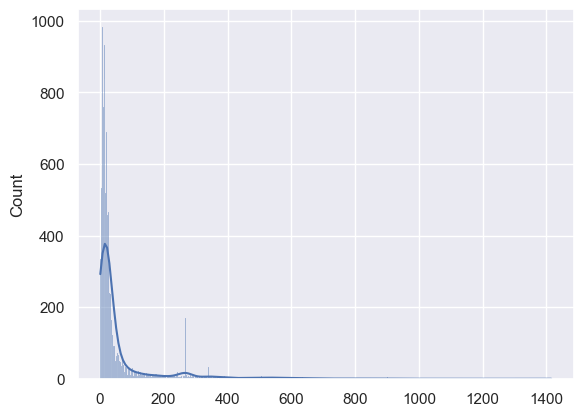

In [7]:
sns.set()
x = bike_trips['trip_duration']
ax = sns.histplot(x.to_list(), kde=True)

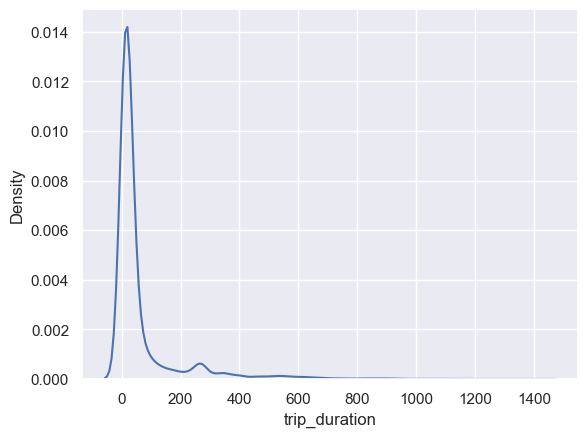

In [8]:
sns.set()
x = bike_trips['trip_duration']
ax = sns.kdeplot(data=bike_trips, x="trip_duration")

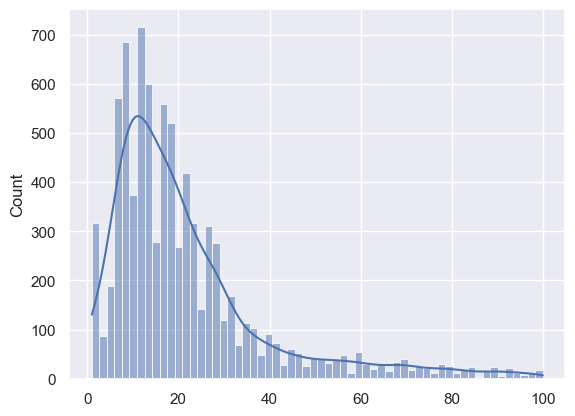

In [9]:
sns.set()
x_detail = bike_trips['trip_duration'][bike_trips['trip_duration'].between(1, 100, inclusive='both')]

ax = sns.histplot(x_detail.to_list(), kde=True)



### trips per day & hour 

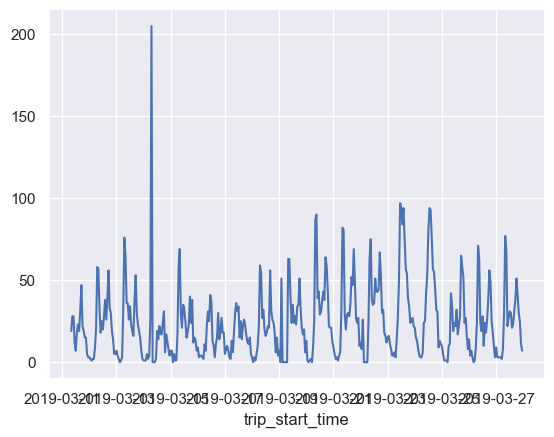

In [10]:
timeseries = bike_trips.set_index('trip_start_time')
x = timeseries.resample('H').size()

sns.lineplot(x=x.index , y= x.values)
sns.set_style("darkgrid")

/var/folders/h2/nzdrmmqs66x13b1h4f0882fh0000gn/T/ipykernel_3204/1918218499.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


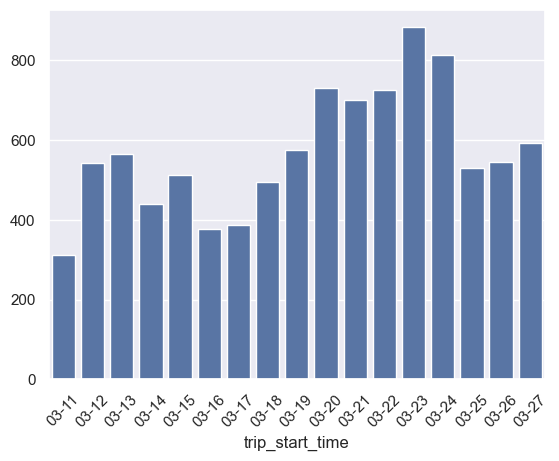

In [11]:
timeseries = bike_trips.set_index('trip_start_time')
x = timeseries.resample('d').size()

ax = sns.barplot(x=x.index.strftime('%m-%d'), y= x.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.set_style("darkgrid")

### Weather

#### hourly

In [12]:
temp_per_hour = pd.read_csv('datasets/berlin_hourly_weather.csv')
temp_per_hour[['datetime','temp']].head()

,datetime,temp
0,2019-03-11 00:00:00,2.5
1,2019-03-11 01:00:00,2.0
2,2019-03-11 02:00:00,2.0
3,2019-03-11 03:00:00,2.0
4,2019-03-11 04:00:00,2.0


In [13]:
trips_per_hour = bike_trips.groupby([pd.Grouper(key='trip_start_time',freq='H')]).size().reset_index(name='trips')
trips_per_hour.head()

,trip_start_time,trips
0,2019-03-11 08:00:00,19
1,2019-03-11 09:00:00,28
2,2019-03-11 10:00:00,28
3,2019-03-11 11:00:00,12
4,2019-03-11 12:00:00,7


In [14]:
temp_per_hour.drop(columns="Unnamed: 0", inplace=True, index=1)

temp_per_hour['datetime'] = pd.to_datetime(temp_per_hour['datetime'])
trips_per_hour = trips_per_hour.join(temp_per_hour.set_index('datetime'), on='trip_start_time')
trips_per_hour.head()

,trip_start_time,trips,temp,precip,rh,wind_spd
0,2019-03-11 08:00:00,19,3.0,0.0,80,7.70
1,2019-03-11 09:00:00,28,4.0,0.0,75,6.95
2,2019-03-11 10:00:00,28,4.0,0.0,77,8.50
3,2019-03-11 11:00:00,12,4.0,0.0,80,8.19
4,2019-03-11 12:00:00,7,3.5,1.0,83,7.44


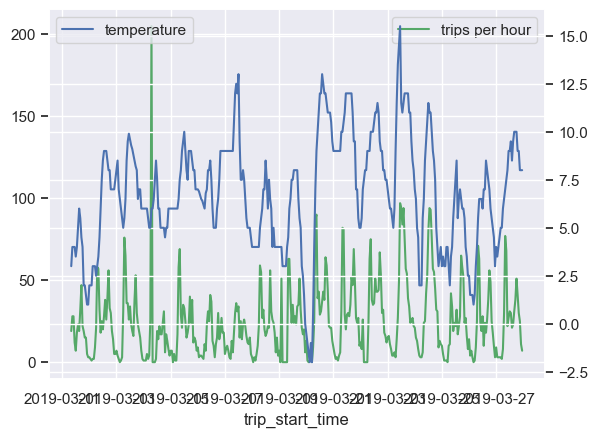

In [15]:
timeseries = trips_per_hour.set_index('trip_start_time')
x1 = timeseries['trips']
x2 = timeseries['temp']
sns.lineplot(x=x1.index , y= x1.values, color="g" , label = 'trips per hour')
ax2 = plt.twinx()
sns.lineplot(x=x1.index , y= x2.values, color="b", ax=ax2 , label = 'temp')
ax2.legend
plt.legend( loc='upper left', labels=['temperature'])
sns.set_style("darkgrid")

In [16]:
timeseries['temp'].corr(timeseries['trips'])

0.43822316792407706

#### daily

In [17]:
temp_per_day = pd.read_csv('datasets/berlin_daily_weather.csv')
trips_per_day = bike_trips.groupby([pd.Grouper(key='trip_start_time',freq='d')]).size().reset_index(name='trips')
trips_per_day = trips_per_day.join(temp_per_hour.set_index('datetime'), on='trip_start_time')
trips_per_day.head()

,trip_start_time,trips,temp,precip,rh,wind_spd
0,2019-03-11,312,2.5,0.0,89,7.94
1,2019-03-12,543,2.0,0.0,93,4.34
2,2019-03-13,566,8.0,0.0,45,7.44
3,2019-03-14,439,6.0,0.5,87,8.50
4,2019-03-15,513,6.0,0.0,83,7.94


In [18]:
trips_per_day = trips_per_day.set_index('trip_start_time')
d1 = trips_per_day['trips']
d2 = trips_per_day['temp']

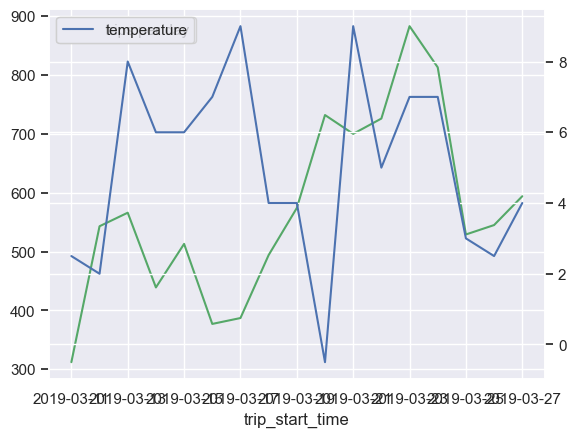

In [19]:
sns.lineplot(x=d1.index , y= d1.values, color="g" , label = 'trips per day')
ax2 = plt.twinx()
sns.lineplot(x=d1.index , y= d2.values, color="b", ax=ax2 , label = 'temp')
ax2.legend
plt.legend( loc='upper left', labels=['temperature'])
sns.set_style("darkgrid")

In [20]:
trips_per_day['temp'].corr(trips_per_day['trips'])

0.051011038778519355

### most frequent trips

In [21]:
grouped = bike_trips.groupby(['from_station','from_lat','from_long','from_station_mode',
                      'to_station','to_lat','to_long','to_station_mode']).size()
grouped.shape

(8971,)

In [22]:
grouped = pd.DataFrame(grouped).reset_index()
grouped.columns = ['from_station','from_lat','from_long','from_station_mode',
                   'to_station','to_lat','to_long','to_station_mode','cnt']
grouped = grouped.sort_values(by='cnt', ascending=False)
grouped.to_pickle('station_combis.pkl')
grouped.head()

,from_station,from_lat,from_long,from_station_mode,to_station,to_lat,to_long,to_station_mode,cnt
6200,S Sonnenallee,52.474241,13.455552,station,Sonnenallee/Treptower Straße,52.477550,13.448826,station,9
3757,Fraenkelufer,52.496227,13.419697,station,Warschauer Str.,52.503377,13.444991,station,9
6615,S+U Jannowitzbrücke,52.515326,13.417563,station,Rudi-Dutschke-Straße,52.507236,13.398167,station,9
4036,Große Hamburger Str.,52.527123,13.398052,station,Schleidenplatz,52.515727,13.472426,station,8
4504,Katzbachstraße,52.487904,13.376718,station,Marheinekeplatz,52.488976,13.394571,station,8


### top 10 pick up & return stations

In [23]:
bike_trips.groupby(['from_station']).size().sort_values(ascending=False).head(10)

from_station
Fraenkelufer                           96
Marheinekeplatz                        94
Hauptbahnhof/Europaplatz               90
S+U Brandenburger Tor                  88
S+U Alexanderplatz (Dircksenstraße)    69
U Frankfurter Tor                      68
Wrangelstraße                          68
U-Stadtmitte                           67
Mehringdamm                            66
Helsingforser Platz                    63
dtype: int64

In [24]:
bike_trips.groupby(['to_station']).size().sort_values(ascending=False).head(10)

to_station
Fraenkelufer                           96
Hauptbahnhof/Europaplatz               85
Marheinekeplatz                        79
Wrangelstraße                          76
S+U Brandenburger Tor                  72
S+U Alexanderplatz (Dircksenstraße)    68
U Frankfurter Tor                      64
U Südstern                             62
U-Stadtmitte                           61
Oranienplatz                           60
dtype: int64

In [25]:
bike_trips.groupby('from_station_mode')['from_station'].nunique()

from_station_mode
floating    1641
station      243
Name: from_station, dtype: int64